<a href="https://colab.research.google.com/github/kshuravi/Oscar_Nomination_Prediction_Model/blob/main/Oscar_Nomination_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

This is an extension of my another Project: Marvel vs DC Films EDA, which was based on webscraping of tables and doing analysis of them. I will be using the same websites to fetch those tables and merge more tables with them to do some prediction analysis.

The goal here is to analyze data from the details on live action films based on DC Comics and Marvel Comics publications. I have scraped six different tables and merged all of them to **predict whether** **high rated films always have high probability to achieve at least one Oscar nomination**. I have chosen Rotten Tomatoes for Rating.

## Importing necessary Libraries

In [ ]:
import urllib.request
import pandas as pd
import numpy as np
import seaborn as sns
import re
from pandas import DataFrame
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Scraping, cleaning and merging all tables

The following tables have been scraped from **List of films based on Marvel Comics publications** on wikipedia and cleaned in the same cell.

In [ ]:
df1 = pd.read_html("https://en.wikipedia.org/wiki/List_of_films_based_on_Marvel_Comics_publications")

In [ ]:
mf = df1[0].drop(['Unnamed: 4'], axis=1)[:59]
mf.tail()

,Year,Title,Production studio(s),Notes
54,2018,Venom,Columbia Pictures,NaN
55,2019,Captain Marvel,Marvel Studios,NaN
56,2019,Avengers: Endgame,Marvel Studios,Nominated for 1 Oscar
57,2019,Dark Phoenix,20th Century Fox,NaN
58,2019,Spider-Man: Far From Home,Columbia Pictures /Marvel Studios,Distributed by Sony Pictures


In [ ]:
mb = df1[14][:58]
columns_mb1 = ['Title', 'Distributor',	'Release_date_US', 'Bud­get_mil­lions',	'Opening_weekend_North_America',	'North_America',	'Other_territories', 'Worldwide']
mb.columns = columns_mb1
mb.tail()

,Title,Distributor,Release_date_US,Bud­get_mil­lions,Opening_weekend_North_America,North_America,Other_territories,Worldwide
53,Spider-Man: Into the Spider-Verse,Sony Pictures,"December 14, 2018",$90,"$35,363,376","$190,241,310","$185,299,521","$375,540,831"
54,Captain Marvel,Walt Disney Studios Motion Pictures,"March 8, 2019",$152,"$153,433,423","$426,829,839","$701,444,955","$1,128,274,794"
55,Avengers: Endgame,Walt Disney Studios Motion Pictures,"April 26, 2019",$356,"$357,115,007","$858,373,000","$1,937,901,401","$2,797,800,564"
56,Dark Phoenix,20th Century Fox,"June 7, 2019",$200,"$32,828,348","$65,845,974","$186,597,000","$252,442,974"
57,Spider-Man: Far From Home,Sony Pictures,"July 2, 2019",$160,"$92,579,212","$390,532,085","$741,395,911","$1,131,927,996"


In [ ]:
mr = df1[15][['Film', 'Rotten Tomatoes']][:61]
columns_mr = ['Title', 'Rotten_Tomatoes']
mr.columns = columns_mr
mr.tail()

,Title,Rotten_Tomatoes
56,Spider-Man: Into the Spider-Verse,97% (375 reviews)[139]
57,Captain Marvel,79% (537 reviews)[141]
58,Avengers: Endgame,94% (521 reviews)[143]
59,Dark Phoenix,22% (378 reviews)[145]
60,Spider-Man: Far From Home,90% (448 reviews)[147]


In [ ]:
mbmr = pd.merge(mb, mr, on='Title')
# mbmr.head()

Merging all tables for Films based on Marvel Comics publications

In [ ]:
m_all = pd.merge(mbmr, mf, on='Title')
m_all = m_all.drop(['Other_territories'], axis=1)
m_all['Comics'] = 'MC'
m_all.head()

,Title,Distributor,Release_date_US,Bud­get_mil­lions,Opening_weekend_North_America,North_America,Worldwide,Rotten_Tomatoes,Year,Production studio(s),Notes,Comics
0,Howard the Duck,Universal Pictures,"August 1, 1986",$37,"$5,070,136","$16,295,774","$37,962,774",15% (48 reviews)[29],1986,Universal Pictures,Co-produced by Lucasfilm,MC
1,Blade,New Line Cinema,"August 21, 1998",$45,"$17,073,856","$70,087,718","$131,183,530",56% (103 reviews)[36],1998,New Line Cinema,NaN,MC
2,X-Men,20th Century Fox,"July 14, 2000",$75,"$54,471,475","$157,299,717","$296,339,527",82% (172 reviews)[38],2000,20th Century Fox,NaN,MC
3,Blade II,New Line Cinema,"March 22, 2002",$54,"$32,528,016","$82,348,319","$155,010,032",57% (151 reviews)[40],2002,New Line Cinema,NaN,MC
4,Spider-Man,Sony Pictures,"May 3, 2002",$139,"$114,844,116","$403,706,375","$821,708,551",90% (245 reviews)[42],2002,Columbia Pictures,Nominated for 2 Oscars,MC


The following tables have been scraped from **List of films based on DC Comics publications** on wikipedia and cleaned in the same cell.

In [ ]:
df2 = pd.read_html("https://en.wikipedia.org/wiki/List_of_films_based_on_DC_Comics_publications")

In [ ]:
df = df2[0][:32]
df.tail()

,Year,Title,Production studio(s),Notes
27,2017,Wonder Woman,Warner Bros./DC Films/RatPac Entertainment/Atl...,Set in the DCEU
28,2017,Justice League,Warner Bros./DC Films/RatPac Entertainment/Atl...,Set in the DCEU. Extended director's cut title...
29,2018,Aquaman,Warner Bros./DC Films/The Safran Company/Cruel...,Set in the DCEU
30,2019,Shazam!,Warner Bros./DC Films/New Line Cinema/The Safr...,Set in the DCEU
31,2019,Joker,Warner Bros./DC Films/Village Roadshow Picture...,"Won 2 Oscars, nominated for 9 more"


In [ ]:
db = df2[12][:35]
columns_db1 = ['Title', 'Distributor',	'Release_date_US', 'Bud­get_mil­lions',	'Opening_weekend_North_America',	'North_America', 'Worldwide']
db.columns = columns_db1
db.tail()

,Title,Distributor,Release_date_US,Bud­get_mil­lions,Opening_weekend_North_America,North_America,Worldwide
30,Justice League,Warner Bros.,"November 17, 2017",$300,"$93,842,239","$229,024,295","$657,924,295"
31,Teen Titans Go! To the Movies,Warner Bros.,"July 27, 2018",$10,"$10,411,189","$29,790,236","$52,090,236"
32,Aquaman,Warner Bros.,"December 21, 2018",$160,"$67,873,522","$335,061,807","$1,148,461,807"
33,Shazam!,Warner Bros.,"April 5, 2019",$100,"$53,505,326","$140,371,656","$365,971,656"
34,Joker,Warner Bros.,"October 4, 2019",$55,"$96,202,337","$335,451,311","$1,074,251,311"


In [ ]:
dr = df2[13][['Film', 'Rotten Tomatoes']][:36]
columns_dr = ['Title', 'Rotten_Tomatoes']
dr.columns = columns_dr
dr.tail()

,Title,Rotten_Tomatoes
31,Justice League,40% (400 reviews)[74]
32,Teen Titans Go! To the Movies,91% (132 reviews)[76]
33,Aquaman,65% (406 reviews)[78]
34,Shazam!,90% (409 reviews)[80]
35,Joker,68% (583 reviews)[82]


In [ ]:
dbdr = pd.merge(db, dr, on='Title')
# dbdr.head()

Merging all tables for Films based on DC Comics publications

In [ ]:
d_all = pd.merge(dbdr, df, on='Title')
d_all['Comics'] = 'DC'
d_all.head()

,Title,Distributor,Release_date_US,Bud­get_mil­lions,Opening_weekend_North_America,North_America,Worldwide,Rotten_Tomatoes,Year,Production studio(s),Notes,Comics
0,Superman,Warner Bros.,"December 10, 1978",$55,"$6,535,784","$134,218,018","$300,218,018",94% (67 reviews)[21],1978,Dovemead Film Export A.G./International Film P...,"Won 1 Special Oscar, nominated for 3 more",DC
1,Superman II,Warner Bros.,"June 19, 1981",$54,"$14,100,523","$108,185,706","$108,185,706",86% (50 reviews)[23],1980,Dovemead Film Export A.G./International Film P...,Director's cut titled Superman II: The Richard...,DC
2,Swamp Thing,Embassy Pictures,"February 19, 1982",$2.5,NaN,NaN,NaN,67% (36 reviews)[25],1982,Embassy Pictures,NaN,DC
3,Superman III,Warner Bros.,"June 17, 1983",$39,"$13,352,357","$59,950,623","$59,950,623",29% (52 reviews)[26],1983,Cantharus Productions N.V./Dovemead Films,NaN,DC
4,Supergirl,TriStar Pictures,"November 21, 1984",$35,"$5,738,249","$14,296,438","$14,296,438",10% (31 reviews)[28],1984,Artistry Ltd/Cantharus Productions/Pueblo Film...,Spin-off to 1978 Superman film,DC


Merging all six tables stacked in one

In [ ]:
mcdcall = m_all.append(d_all).sort_values('Year', ascending=True)
mcdcall.head()

,Title,Distributor,Release_date_US,Bud­get_mil­lions,Opening_weekend_North_America,North_America,Worldwide,Rotten_Tomatoes,Year,Production studio(s),Notes,Comics
0,Superman,Warner Bros.,"December 10, 1978",$55,"$6,535,784","$134,218,018","$300,218,018",94% (67 reviews)[21],1978,Dovemead Film Export A.G./International Film P...,"Won 1 Special Oscar, nominated for 3 more",DC
1,Superman II,Warner Bros.,"June 19, 1981",$54,"$14,100,523","$108,185,706","$108,185,706",86% (50 reviews)[23],1980,Dovemead Film Export A.G./International Film P...,Director's cut titled Superman II: The Richard...,DC
2,Swamp Thing,Embassy Pictures,"February 19, 1982",$2.5,NaN,NaN,NaN,67% (36 reviews)[25],1982,Embassy Pictures,NaN,DC
3,Superman III,Warner Bros.,"June 17, 1983",$39,"$13,352,357","$59,950,623","$59,950,623",29% (52 reviews)[26],1983,Cantharus Productions N.V./Dovemead Films,NaN,DC
4,Supergirl,TriStar Pictures,"November 21, 1984",$35,"$5,738,249","$14,296,438","$14,296,438",10% (31 reviews)[28],1984,Artistry Ltd/Cantharus Productions/Pueblo Film...,Spin-off to 1978 Superman film,DC


## More cleaning, shortening and resampling the data

In [ ]:
mcdc_all = mcdcall
mcdc_all['Oscar_Nomination'] = mcdc_all['Notes'].map(lambda x: 1 if 'Oscar' in str(x) else 0)
mcdc_all['Comics'] = mcdc_all['Comics'].map(lambda x: 1 if 'DC' in str(x) else 0)
mcdc_all['Rotten_Tomatoes'] = mcdc_all['Rotten_Tomatoes'].str.extract(r'(\d+)').astype(int)
mcdc_all[mcdc_all.columns[3:7]] = mcdc_all[mcdc_all.columns[3:7]].replace('[\$,]', '', regex=True).astype(float)
mcdc_all['Budget'] = mcdc_all['Bud­get_mil­lions'].astype(float)*1000000.00

mdst = mcdc_all.drop(['Title', 'Distributor', "Release_date_US", "Year", "Production studio(s)", "Notes", "Bud­get_mil­lions"], axis=1)
mds = mdst.dropna()
mds.tail()

,Opening_weekend_North_America,North_America,Worldwide,Rotten_Tomatoes,Comics,Oscar_Nomination,Budget
49,357115007.0,858373000.0,2.797801e+09,94,0,1,356000000.0
48,153433423.0,426829839.0,1.128275e+09,79,0,0,152000000.0
26,53505326.0,140371656.0,3.659717e+08,90,1,0,100000000.0
51,92579212.0,390532085.0,1.131928e+09,90,0,0,160000000.0
27,96202337.0,335451311.0,1.074251e+09,68,1,1,55000000.0


Text(0, 0.5, 'Count')

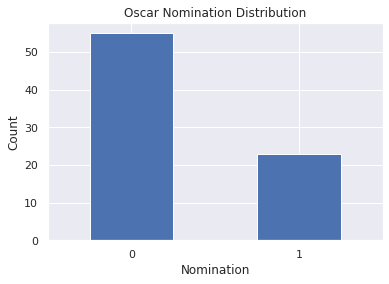

In [ ]:
count_classes = pd.value_counts(mds['Oscar_Nomination'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Oscar Nomination Distribution")
plt.xlabel("Nomination")
plt.ylabel("Count")

There is a huge class imbalance among the Oscar Nomination samples. Therefore, resampling is needed. I am choosing Oversampling because I do not want to lose any data.

In [ ]:
# Find the number of churned and not churned accounts
nominated = mds[mds['Oscar_Nomination'] == 1]
not_nominated = mds[mds['Oscar_Nomination'] == 0]

print(nominated.shape,not_nominated.shape)

(23, 7) (55, 7)


In [ ]:
#Drop Attrition_Flag from dataset
X = mds.drop(['Oscar_Nomination'], axis=1)
#Get target
y = mds['Oscar_Nomination']

print(X.shape)
print(y.shape)

(78, 6)
(78,)


In [ ]:
os =  RandomOverSampler(ratio=1)
X_train_res, y_train_res = os.fit_sample(X, y)

In [ ]:
print(X_train_res.shape)
print(y_train_res.shape)

(110, 6)
(110,)


In [ ]:
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({0: 55, 1: 23})
Resampled dataset shape Counter({1: 55, 0: 55})


In [ ]:
data_res = pd.DataFrame(X_train_res, columns=X.columns)
data_res['Oscar_Nomination'] = y_train_res
print(data_res.shape)

(110, 7)


## Splitting the dataset and perform feature scaling

In [ ]:
# Split df into X and y
ys = data_res['Oscar_Nomination'].copy()
X_s = data_res.drop('Oscar_Nomination', axis=1).copy()
    
# Scale X with a standard scaler
scaler = StandardScaler()
Xsp = pd.DataFrame(scaler.fit_transform(X_s), columns=X_s.columns)

Final data that is to be put to train and test

In [ ]:
data_res.head()

,Opening_weekend_North_America,North_America,Worldwide,Rotten_Tomatoes,Comics,Budget,Oscar_Nomination,Probability_of_Nomination
0,6535784.0,134218018.0,300218018.0,94.0,1.0,55000000.0,1,1.0
1,14100523.0,108185706.0,108185706.0,86.0,1.0,54000000.0,0,0.0
2,13352357.0,59950623.0,59950623.0,29.0,1.0,39000000.0,0,0.0
3,5738249.0,14296438.0,14296438.0,10.0,1.0,35000000.0,0,0.0
4,5070136.0,16295774.0,37962774.0,15.0,0.0,37000000.0,0,0.0


## Train and test data with 70% - 30% ratio

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Xsp, ys, test_size=0.3, random_state=50)

Perform different types of modelling

* Logistic Regression Model

In [ ]:
#Fit the Logistic Regression Model
logmodel = LogisticRegression(random_state=50)
logmodel.fit(X_train,y_train)

#Predict the value for new, unseen data
pred = logmodel.predict(X_test)

# Find Accuracy using accuracy_score method
logmodel_accuracy = round(metrics.accuracy_score(y_test, pred) * 100, 2)

* Decision Tree Classification Model

In [ ]:
#Fit the Decision Tree Classification Model
dtmodel = DecisionTreeClassifier(criterion = "gini", random_state = 50)
dtmodel.fit(X_train, y_train) 
  
#Predict the value for new, unseen data
dt_pred = dtmodel.predict(X_test)

# Find Accuracy using accuracy_score method
dt_accuracy = round(metrics.accuracy_score(y_test, dt_pred) * 100, 2)

* Random Forest Classification Model

In [ ]:
#Fit the Random Forest Classification Model
rfmodel = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 50)
rfmodel.fit(X_train, y_train) 
  
#Predict the value for new, unseen data
rf_pred = rfmodel.predict(X_test)

# Find Accuracy using accuracy_score method
rf_accuracy = round(metrics.accuracy_score(y_test, rf_pred) * 100, 2)

## Showing accuracy for all of the models and generate metrics

In [ ]:
# Compare Several models according to their Accuracies
Model_Comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy Score %': [logmodel_accuracy, dt_accuracy, rf_accuracy]})
Model_Comparison_df = Model_Comparison.sort_values(by='Accuracy Score %', ascending=False)
Model_Comparison_df = Model_Comparison_df.set_index('Accuracy Score %')
Model_Comparison_df.reset_index()

,Accuracy Score %,Model
0,93.94,Decision Tree
1,90.91,Random Forest
2,81.82,Logistic Regression


In [ ]:
# Generate confusion matrix for Decision Tree as it has maximum Accuracy
conf_mat_dtmodel = confusion_matrix(y_test, dt_pred)
conf_mat_dtmodel

array([[19,  2],
       [ 0, 12]])

In [ ]:
# Generate classification report for Decision Tree
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        21
           1       0.86      1.00      0.92        12

    accuracy                           0.94        33
   macro avg       0.93      0.95      0.94        33
weighted avg       0.95      0.94      0.94        33



So, from the above report we can see that Decision Forest Classification Model not only has highest accuracy, but also has very good overall performance.

##Analyzing the dataset with probability of Nomination prediction

In [ ]:
df2 = data_res
df2['Probability_of_Nomination'] = dtmodel.predict_proba(Xsp[X_test.columns])[:,1]
df2.head()

,Opening_weekend_North_America,North_America,Worldwide,Rotten_Tomatoes,Comics,Budget,Oscar_Nomination,Probability_of_Nomination
0,6535784.0,134218018.0,300218018.0,94.0,1.0,55000000.0,1,1.0
1,14100523.0,108185706.0,108185706.0,86.0,1.0,54000000.0,0,0.0
2,13352357.0,59950623.0,59950623.0,29.0,1.0,39000000.0,0,0.0
3,5738249.0,14296438.0,14296438.0,10.0,1.0,35000000.0,0,0.0
4,5070136.0,16295774.0,37962774.0,15.0,0.0,37000000.0,0,0.0


In [ ]:
df3 = df2[df2.Rotten_Tomatoes >= 90]
df4 = df3[df3.Probability_of_Nomination == 0]
df4

,Opening_weekend_North_America,North_America,Worldwide,Rotten_Tomatoes,Comics,Budget,Oscar_Nomination,Probability_of_Nomination
56,179139142.0,408084349.0,1.153304e+09,91.0,0.0,250000000.0,0,0.0
60,103251471.0,412563408.0,8.218470e+08,93.0,1.0,149000000.0,0,0.0
63,122744989.0,315058289.0,8.539771e+08,93.0,0.0,180000000.0,0,0.0
64,117027503.0,334201140.0,8.801669e+08,92.0,0.0,175000000.0,0,0.0
75,53505326.0,140371656.0,3.659717e+08,90.0,1.0,100000000.0,0,0.0
76,92579212.0,390532085.0,1.131928e+09,90.0,0.0,160000000.0,0,0.0


In [ ]:
df5 = df2[df2.Rotten_Tomatoes >= 90]
df6 = df5[df5.Probability_of_Nomination == 1]
df6

,Opening_weekend_North_America,North_America,Worldwide,Rotten_Tomatoes,Comics,Budget,Oscar_Nomination,Probability_of_Nomination
0,6535784.0,134218018.0,3.002180e+08,94.0,1.0,55000000.0,1,1.0
12,114844116.0,403706375.0,8.217086e+08,90.0,0.0,139000000.0,1,1.0
19,88156227.0,373585825.0,7.889765e+08,93.0,0.0,200000000.0,1,1.0
29,158411483.0,535234033.0,1.004934e+09,94.0,1.0,185000000.0,1,1.0
30,98618668.0,318412101.0,5.851742e+08,94.0,0.0,140000000.0,1,1.0
42,207438708.0,623357910.0,1.518813e+09,92.0,0.0,220000000.0,1,1.0
48,90823660.0,233921534.0,7.478628e+08,90.0,0.0,200000000.0,1,1.0
49,94320883.0,333176600.0,7.733286e+08,91.0,0.0,170000000.0,1,1.0
51,95023721.0,259766572.0,7.142643e+08,90.0,0.0,170000000.0,1,1.0
62,88411916.0,226277068.0,6.167956e+08,93.0,0.0,97000000.0,1,1.0


In [ ]:
print("High rating with low probability count: ", len(df4))
print("High rating with high probability count: ", len(df5))

High rating with low probability count:  6
High rating with high probability count:  33


I have chosen the Rotten Tomatoes Rating as high as 90%. With the prediction that my model made, it seems that high rated films have much high chance to get nominated for the Oscars.

In [ ]:
print("Lowest budget high rated film with no nomination: ", df4['Budget'].min())
print("Lowest budget high rated film with at least one nomination:", df5['Budget'].min())

Lowest budget high rated film with no nomination:  100000000.0
Lowest budget high rated film with at least one nomination: 55000000.0


Interestingly, the Budget does not have anything to do with the high ratings. It has been found that high rated films can have lower budgets than the low rated films.

## Conclusion

Based on the goal of the dataset that I have gathered, the overall performance of my model was satisfactory. I was able to predict and analyze my desired goal. However, judging from the features from this dataset for a film to nominate for an Oscar is definitely not an easy job. A film must meet the high quality in at least considerable amount of features to get shortlisted for Oscar nominations. A lot of research will be needed to gather more data and predict many more things!